# Training a Model

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


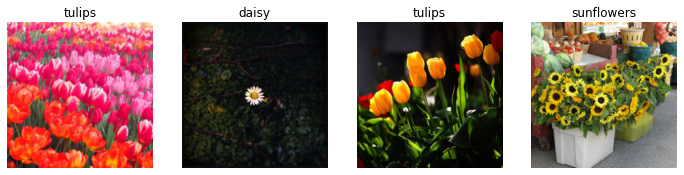

In [1]:
from fastai.vision.all import *

path = r"C:\Users\Dell\Desktop\datasets\flower_photos" #add the path to the dataset

flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [2]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.050811,0.344289,0.111717,05:45


epoch,train_loss,valid_loss,error_rate,time
0,0.390411,0.288962,0.088556,04:32
1,0.243389,0.255647,0.083106,04:33


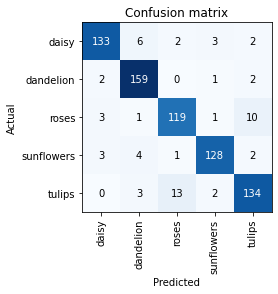

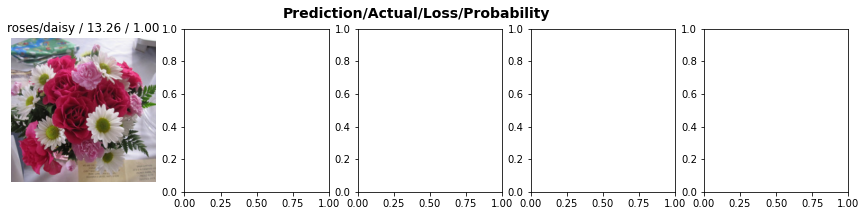

In [3]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [4]:
learn.export()

In [5]:
learn_inf = load_learner(r'C:\Users\Dell\Desktop\my_fastai\export.pkl') #add the path to the trained model
learn_inf.predict(r'C:\Users\Dell\Desktop\datasets\images\sunflower1.jpg') #add the path to an example image

('sunflowers',
 TensorBase(3),
 TensorBase([8.3672e-08, 1.2255e-05, 1.0477e-05, 9.9998e-01, 2.0790e-07]))